# Análise exploratória de dados

Estatística descritiva e Visualização de dados

Conjunto de dados: "Forbes Highest Paid Athletes 1990-2020"

## Carregar bibliotecas

In [549]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd 

## Dicionário de dados

In [550]:
dicionario_dados = pd.read_csv('../../data/external/dicionario_atividade-05.csv', delimiter = ',')
dicionario_dados = dicionario_dados.style.set_properties(**{'text-align': 'left'})
dicionario_dados

,variaveis,significado,tipo
0,S.NO,Contador,nominal
1,Name,Nome do atleta,nominal
2,Nationality,"País de nascimento ['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria', 'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland', 'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino', 'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico']",nominal
3,Current Rank,"Classificação atual do atleta [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",ordinal
4,Previous Year Ranking,Classificação do ano anterior,nominal
5,Sport,"Esporte praticado ['boxing', 'auto racing', 'golf', 'basketball', 'Basketball', 'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing', 'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball', 'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey', 'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer', 'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA']",nominal
6,Year,Ano da competição [1990 - 2020],ordinal
7,earnings ($million),Ganho em milhões de dólares,ordinal


## Leitura do arquivo de dados

In [551]:
df = pd.read_csv('../../data/raw/Forbes_Richest_Atheletes_Forbes_Richest_Athletes_1990-2020.csv', delimiter = ',')
df.Sport = df.Sport.str.lower()
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


## Descrição dos dados

In [552]:
# Estatísticas de cada coluna
df.describe() 

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [553]:
# Quantidade de linhas x colunas
df.shape 

(301, 8)

In [554]:
# Nomes das colunas que representam as variáveis
df.columns 

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [555]:
# Tipo e contagem por coluna
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [556]:
# Número de valores nulos
df.isnull().sum() 

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [557]:
# Observação dos elementos da coluna que apresentou valores nulos
df['Previous Year Rank'].unique() 

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)


## Perguntas de partida e hipóteses

Os dados estatísticos referem-se a uma listagem completa dos atletas mais bem pagos do mundo desde a primeira lista publicada pela Forbes em 1990. Baseado neles é possível estabelecer perguntas de partida a partir das correlações entre colunas, tais como:

A partir dos salários é possível obter os dez esportes mais relevantes no período analisado? #1

Qual esporte esteve maior tempo na primeira colocação do ranking? #2

A ausência de dados pode ser prejudicial para a análise? As variáveis precisam ser padronizadas? #3

HIPÓTESES: 

Com base nos esportes que estiveram no ranking 1, é possível analisar o crescimento/decaimento exponencial dos salários ao longo do tempo. #1

É possível predizer a taxa de crescimento de salário máximo por esporte. #2


## Insights

Informações relevantes e resposta as perguntas de partida.

In [585]:
# Atleta mais bem pago do mundo no período de 1990 a 2020.
df.Name[df['earnings ($ million)'] == df['earnings ($ million)'].max()]

241    Floyd Mayweather
Name: Name, dtype: object

In [586]:
# Esportes praticados pelos atletas que menos ganham
df.Sport[df['earnings ($ million)'] == df['earnings ($ million)'].min()]

7    basketball
8          golf
9        boxing
Name: Sport, dtype: object

In [587]:
# Ranking 1 nos últimos dez ano
df[df['Current Rank'] == 1][-10:]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
201,202,Tiger Woods,USA,1,1,golf,2011,75.0
211,212,Floyd Mayweather,USA,1,?,boxing,2012,85.0
221,222,Tiger Woods,USA,1,3,golf,2013,78.1
231,232,Floyd Mayweather,USA,1,14,boxing,2014,105.0
241,242,Floyd Mayweather,USA,1,1,boxing,2015,300.0
251,252,Cristiano Ronaldo,Portugal,1,3,soccer,2016,88.0
261,262,Cristiano Ronaldo,Portugal,1,1,soccer,2017,93.0
271,272,Floyd Mayweather,USA,1,>100,boxing,2018,285.0
281,282,Lionel Messi,Argentina,1,2,soccer,2019,127.0
291,292,Roger Federer,Switzerland,1,5,tennis,2020,106.3


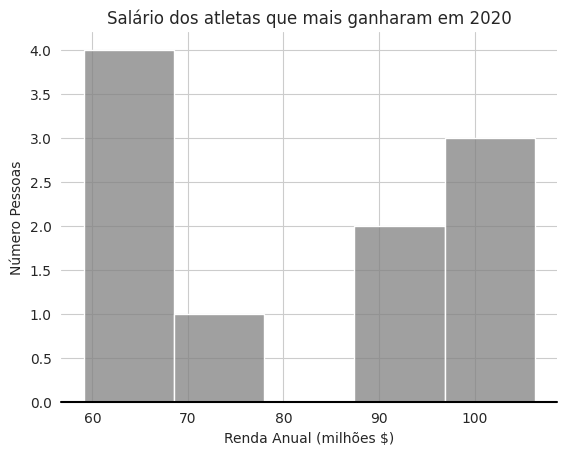

In [594]:
#Relação salário x número de pessoas no ano de 2020
sns.set_style("whitegrid")
dado = df.sort_values(by='earnings ($ million)', ascending=False)
ax = sns.histplot(data=dado[dado.Year == 2020], x='earnings ($ million)', color = 'grey')
plt.ylabel('Número Pessoas')
plt.xlabel('Renda Anual (milhões $)')
plt.title('Salário dos atletas que mais ganharam em 2020')


ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

# #1
Os dez esportes com maiores investimentos acumulados no período da amostra podem ser obtidos agrupando-se os esportes e acumulando os salários. 

In [589]:
receita = df.groupby('Sport').sum()
receita = receita.sort_values(by='earnings ($ million)', ascending=False)[:10]
receita['earnings ($ million)']

Sport
basketball           3418.1
boxing               2298.8
soccer               2223.5
golf                 2136.5
tennis               1017.3
american football     901.2
f1 racing             397.0
auto racing           386.3
f1 motorsports        248.0
baseball              146.1
Name: earnings ($ million), dtype: float64

# 2# 
O esporte que esteve por maior tempo no top 1 do ranking pode ser obtido como:


In [590]:
df[df['Current Rank'] == 1].Sport.value_counts()

# OBS: É importante observar que temos esportes duplicados por apresentarem padrão de escrita diferentes.

golf           11
boxing          7
basketball      6
soccer          3
auto racing     2
tennis          1
Name: Sport, dtype: int64

# #3

A ausência de dados é prejucial se representar significativo percentual de dados da amostra. Existem formas de preencher os dados, porém nem sempre esta será a melhor alternativa em virtude de outliers ou por ser uma variável que não pode ser predita. Além disso, se a correlação não utilizar a variável envolvida, esta pode ser desprezada.

É importante que os dados apresentem um padrão, uma vez que variáveis iguais, mas com padrões de escrita diferentes são entendidas como distintas. Ex: 'Golf' e 'golf'; 'Basketball' e 'basquetball'; 'Box' e 'box'.
Surge então a necessidade de se fazer um pré processamento dos dados antes das análises a fim de padronizá-los. Caso do presente arquivo de dados.

# # RESPOSTA AS HIPÓTESES
Com o agrupamento anual dos salários por esporte em um gráfico de linhas é possível observar o crescimento/decaimento ao longo do tempo.


A partir de uma regressão matemática é possível estimar a progressão dos salários por esporte para determinado ano. 